In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [2]:
np.random.seed(42)

data = pd.DataFrame({
    "demand": np.random.randint(20, 200, 1000),
    "competitor_price": np.random.randint(200, 800, 1000),
    "inventory": np.random.randint(10, 300, 1000),
    "day_of_week": np.random.randint(1, 8, 1000),
    "previous_price": np.random.randint(250, 750, 1000)
})

# target price
data["optimal_price"] = (
    data["competitor_price"] * 0.6 +
    data["demand"] * 1.5 -
    data["inventory"] * 0.8 +
    data["previous_price"] * 0.4
)

data.head()


,demand,competitor_price,inventory,day_of_week,previous_price,optimal_price
0,122,746,111,6,271,650.2
1,199,712,51,1,403,846.1
2,112,495,297,3,676,497.8
3,34,519,176,3,688,496.8
4,126,771,118,2,544,774.8


In [3]:
X = data.drop("optimal_price", axis=1)
y = data["optimal_price"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [6]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 26.561502500000042


In [7]:
new_product = pd.DataFrame({
    "demand": [150],
    "competitor_price": [500],
    "inventory": [40],
    "day_of_week": [6],
    "previous_price": [480]
})

predicted_price = model.predict(new_product)
print("Recommended Dynamic Price: ₹", round(predicted_price[0], 2))


Recommended Dynamic Price: ₹ 706.72


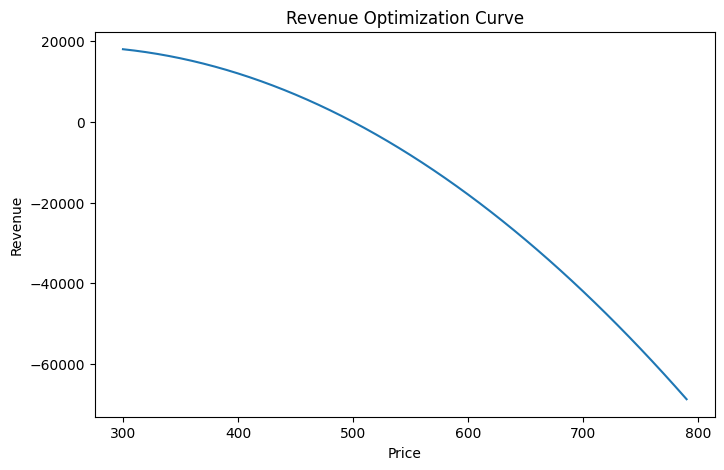

In [8]:
price_range = np.arange(300, 800, 10)
demand = 150

revenue = price_range * (demand - 0.3 * price_range)

plt.figure(figsize=(8,5))
plt.plot(price_range, revenue)
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Revenue Optimization Curve")
plt.show()
